# Initial EDA for Project

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import missingno as msno

from collections import Counter
import re
from wordcloud import WordCloud

In [19]:
# !pip install wordcloud
# !pip install textblob

In [2]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('../data/Sarcasm_Headlines_Dataset_v2.json'))

In [3]:
df = pd.DataFrame(data)

print(df.head())
print()
print()
print()
print(df.info())

df

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headlin

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


<Axes: >

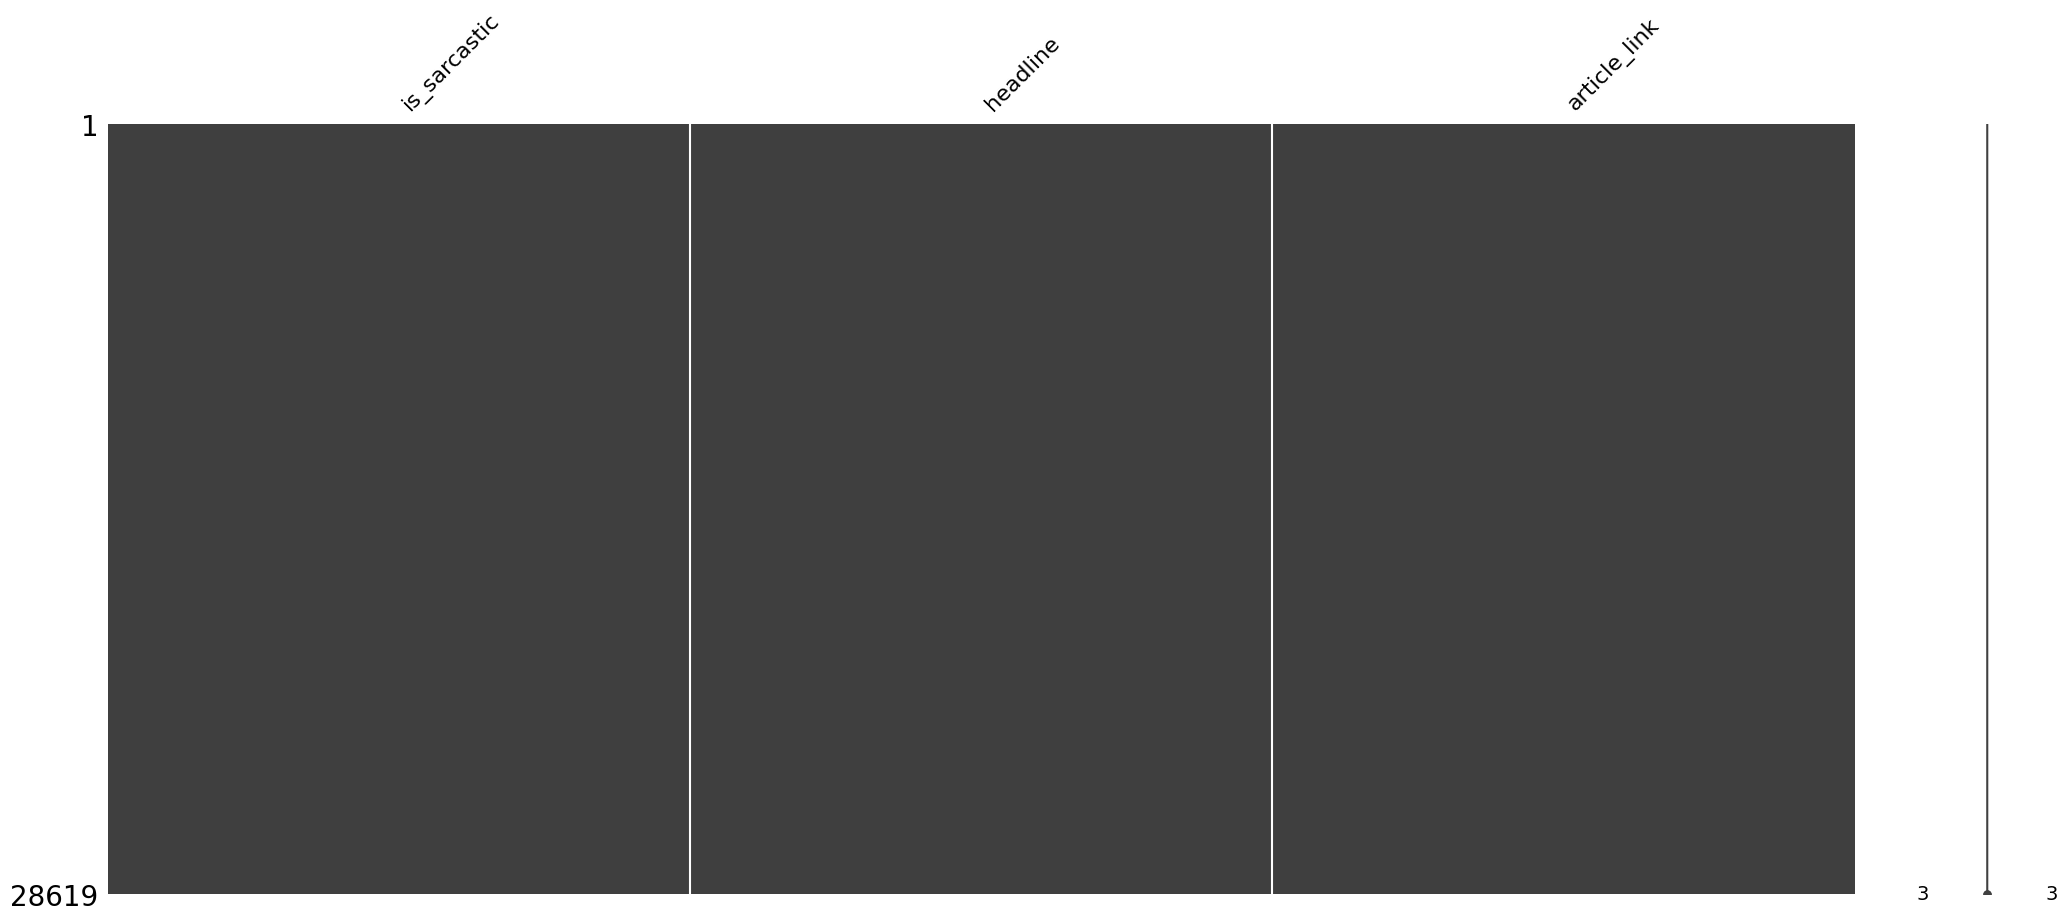

In [4]:
msno.matrix(df)

No missingness present in the data.

In [5]:
print(df[df.duplicated(keep = False)])
df = df[df.duplicated(keep='first') == False]

       is_sarcastic                                           headline  \
646               0                        hillary clinton vs. herself   
14897             1  nation not sure how many ex-trump staffers it ...   
18572             0                        hillary clinton vs. herself   
25743             1  nation not sure how many ex-trump staffers it ...   

                                            article_link  
646    https://www.huffingtonpost.comhttp://nymag.com...  
14897  https://politics.theonion.com/nation-not-sure-...  
18572  https://www.huffingtonpost.comhttp://nymag.com...  
25743  https://politics.theonion.com/nation-not-sure-...  


There appear to be 2 duplicate rows in the dataframe, so we'll drop them.

In [6]:
print(df[df.duplicated(keep = False)])

Empty DataFrame
Columns: [is_sarcastic, headline, article_link]
Index: []


No more duplicates!

In [7]:
df = df.assign(headline_length=df['headline'].apply(lambda x: len(x.split())))

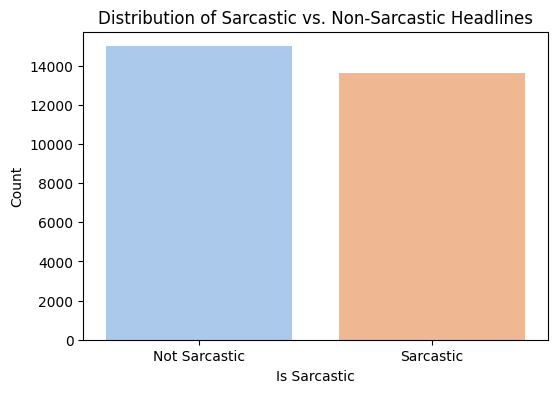

is_sarcastic
0    0.523605
1    0.476395
Name: proportion, dtype: float64

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="is_sarcastic", hue="is_sarcastic", palette="pastel", legend=False)
plt.title("Distribution of Sarcastic vs. Non-Sarcastic Headlines")
plt.xlabel("Is Sarcastic")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Sarcastic", "Sarcastic"])
plt.show()

df['is_sarcastic'].value_counts(normalize=True)

It appears the classes are almost balanced, with "Not Sarcastic" having approximately 14,000 values, while is_sarcastic has approximately 13,000 values.

In [10]:
df

,is_sarcastic,headline,article_link,headline_length
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,8
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,13
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,7
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,8
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,9
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,7
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,13
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...,12
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,8


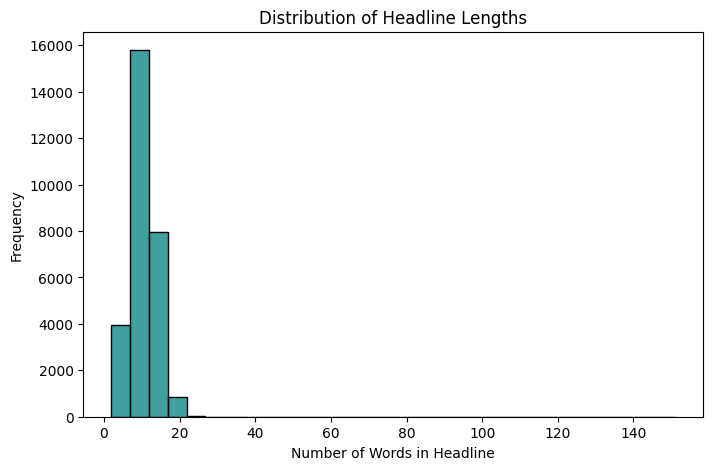

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['headline_length'], bins=30, kde=False, color="teal")
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Words in Headline")
plt.ylabel("Frequency")
plt.show()


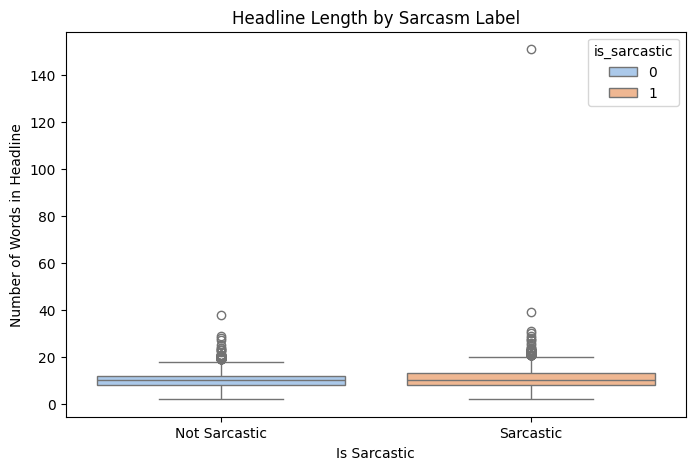

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['is_sarcastic'], hue = df['is_sarcastic'], y=df['headline_length'], palette="pastel")
plt.title("Headline Length by Sarcasm Label")
plt.xlabel("Is Sarcastic")
plt.ylabel("Number of Words in Headline")
plt.xticks([0,1], ["Not Sarcastic", "Sarcastic"])
plt.show()


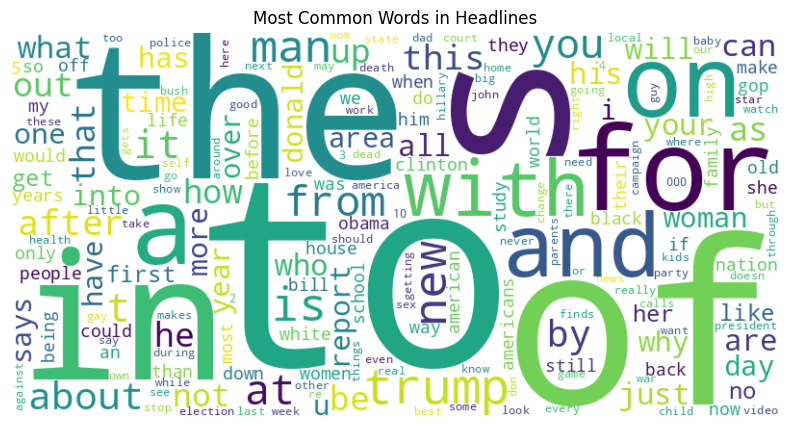

In [22]:
all_words = ' '.join(df['headline'].astype(str))

words = re.findall(r'\b\w+\b', all_words.lower())

word_counts = Counter(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Headlines")
plt.show()

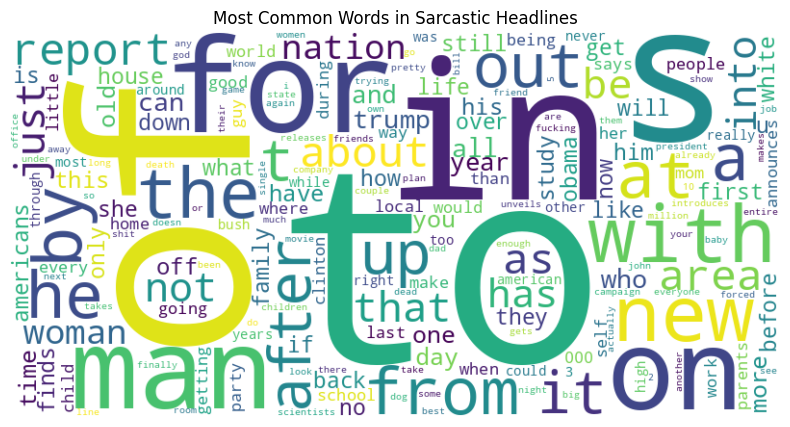

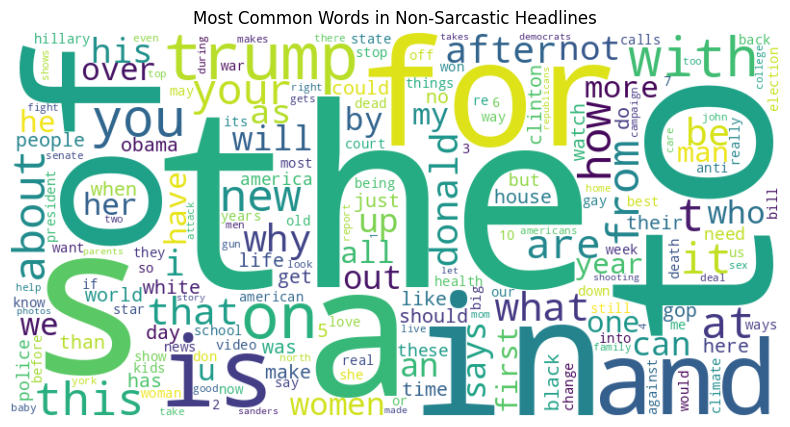

In [23]:
def plot_wordcloud_by_class(sarcasm_label):
    text = ' '.join(df[df['is_sarcastic'] == sarcasm_label]['headline'].astype(str))
    words = re.findall(r'\b\w+\b', text.lower())
    word_counts = Counter(words)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in {'Sarcastic' if sarcasm_label else 'Non-Sarcastic'} Headlines")
    plt.show()

plot_wordcloud_by_class(1)  # Sarcastic
plot_wordcloud_by_class(0)  # Non-Sarcastic


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_ngrams(df['headline'], n=10, ngram_range=(2,2))
top_trigrams = get_top_ngrams(df['headline'], n=10, ngram_range=(3,3))

print("Top 10 Bigrams:", top_bigrams)
print("Top 10 Trigrams:", top_trigrams)


Top 10 Bigrams: [('donald trump', np.int64(464)), ('year old', np.int64(273)), ('area man', np.int64(263)), ('white house', np.int64(213)), ('hillary clinton', np.int64(178)), ('new york', np.int64(133)), ('study finds', np.int64(130)), ('supreme court', np.int64(120)), ('high school', np.int64(85)), ('bernie sanders', np.int64(82))]
Top 10 Trigrams: [('new study finds', np.int64(35)), ('new york times', np.int64(28)), ('huffpost rise need', np.int64(22)), ('rise need know', np.int64(22)), ('new york city', np.int64(17)), ('friday morning email', np.int64(15)), ('funniest tweets women', np.int64(15)), ('tweets women week', np.int64(15)), ('12 year old', np.int64(13)), ('donald trump says', np.int64(13))]


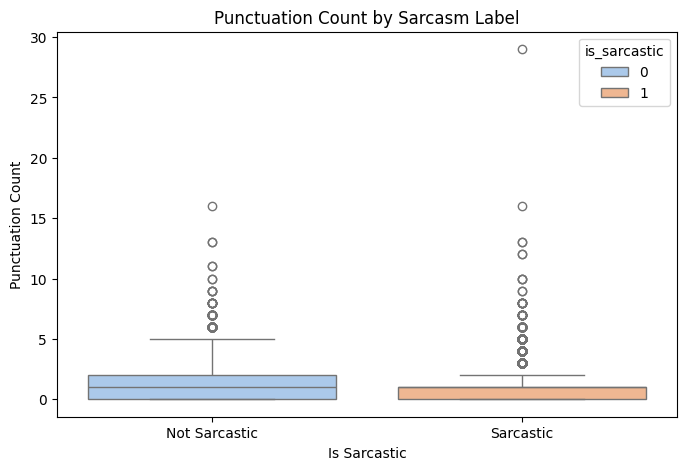

In [26]:
import string

def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

df['punctuation_count'] = df['headline'].apply(count_punctuation)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['is_sarcastic'], hue = df['is_sarcastic'], y=df['punctuation_count'], palette="pastel")
plt.title("Punctuation Count by Sarcasm Label")
plt.xlabel("Is Sarcastic")
plt.ylabel("Punctuation Count")
plt.xticks([0,1], ["Not Sarcastic", "Sarcastic"])
plt.show()


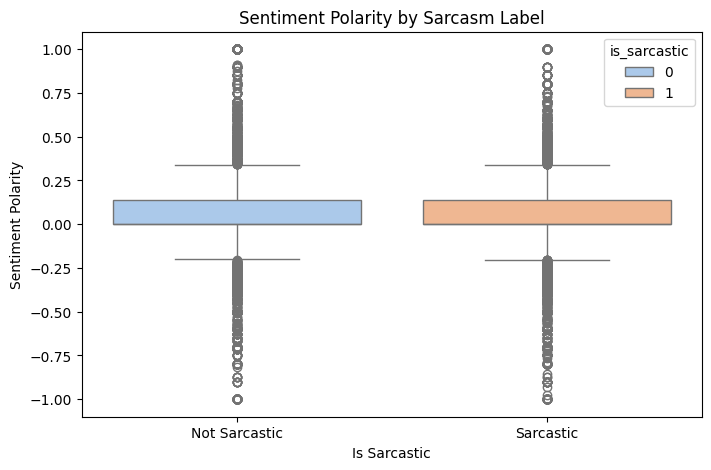

In [33]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['headline'].apply(get_sentiment)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['is_sarcastic'], hue = df['is_sarcastic'], y=df['sentiment'], palette="pastel")
plt.title("Sentiment Polarity by Sarcasm Label")
plt.xlabel("Is Sarcastic")
plt.ylabel("Sentiment Polarity")
plt.xticks([0,1], ["Not Sarcastic", "Sarcastic"])
plt.show()
